# Поиск инсайтов и точек роста
- **Автор:** Алиса Гизова
- **Дата:** 09.11.2025

### Контекст:
В условиях высокой конкурентной динамики на рынке онлайн-доставки еды, компания ставит задачу перейти от стабильной операционной работы к ускоренному росту. Ключевыми направлениями развития определены повышение лояльности существующей пользовательской базы и оптимизация взаимодействия с партнерами-ресторанами. Для этого необходимы углубленные данные о поведении клиентов и эффективности работы партнёров.

### Цель проекта:
Провести комплексный анализ данных для выявления точек роста и разработки стратегических рекомендаций, направленных на:
- Увеличение показателей удержания и жизненного цикла пользователей.
- Повышение эффективности и взаимовыгодности сотрудничества с партнёрскими ресторанами.

Ключевые вопросы бизнеса:
- Каковы паттерны поведения пользователей и как на их основе выстроить более эффективную работу по удержанию?
- Как выглядит путь пользователя в сервисе и на каких этапах происходят наибольшие потери конверсии?
- Как можно сегментировать партнёров-рестораны для разработки дифференцированной стратегии поддержки и развития?

### Задачи и методы анализа:

- Анализ пользовательского пути.
- Сегментация пользователей.
- Кластеризация партнёров.

### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

## Загрузка данных и их предобработка

In [3]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans
import numpy as np

In [5]:
# Выводим первые строки датафрейма на экран
df.head()

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  float64       
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int64         
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  datetime64[ns]
 6   visit_id      205510 non-null  int64         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  datetime64[ns]
 9   rest_id       166915 non-null  object        
 10  object_id     21308 non-null   float64       
 11  order_id      7008 non-null    float64       
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float64       
 14  commission    21308 non-null   float64       
dtypes: datetime64[ns]

In [7]:
# Сохраняем количество строк в исходном датафрейме
initial_row_count = df.shape[0]

---

Датасет `isides_data.csv` содержит 15 столбцов и 205510 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64` и `float64`) и строковые значения (`object`). Значения в столбцах `first_date` и `datetime` содержат информацию о дате и времени и должны храниться в типе данных даты и времени `datetime64`. Столбцы `user_id`, `object_id` и `order_id` содержат уникальные идентификаторы и значения в них можно представить в формате `int64`.
- Датасет содержит пропуски в столбцах `rest_id`, `object_id`, `order_id`, `revenue`, `delivery` и `commission`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [9]:
# Проверим типы данных в датафрейме df с помощью атрибута dtypes
df.dtypes

visitor_uuid            object
user_id                float64
device_type             object
city_id                  int64
source                  object
first_date      datetime64[ns]
visit_id                 int64
event                   object
datetime        datetime64[ns]
rest_id                 object
object_id              float64
order_id               float64
revenue                float64
delivery               float64
commission             float64
dtype: object

In [10]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values(ascending=False)

order_id        198502
revenue         198502
delivery        198502
object_id       184202
commission      184202
rest_id          38595
visitor_uuid         0
user_id              0
device_type          0
city_id              0
source               0
first_date           0
visit_id             0
event                0
datetime             0
dtype: int64

In [11]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

order_id        96.589947
revenue         96.589947
delivery        96.589947
object_id       89.631648
commission      89.631648
rest_id         18.780108
visitor_uuid     0.000000
user_id          0.000000
device_type      0.000000
city_id          0.000000
source           0.000000
first_date       0.000000
visit_id         0.000000
event            0.000000
datetime         0.000000
dtype: float64

Количество пропусков в столбцах `rest_id`, `object_id`, `order_id`, `revenue`, `delivery` и `commission` значительное, поэтому пропуски в них можно заменить на значение-индикатор.

In [13]:
# Проверка числовых столбцов на наличие значения-индикатора -1
numeric_columns = ['object_id', 'order_id', 'revenue', 'delivery', 'commission']

for column in numeric_columns:
    if -1 in df[column].values:
        print(f'{column} - Элемент найден')
    else:
        print(f'{column} - Элемент не найден')

# Проверка текстового столбца на наличие значения-индикатора
if 'Нет информации' in df['rest_id'].values:
    print('rest_id - Элемент найден')
else:
    print('rest_id - Элемент не найден')

object_id - Элемент не найден
order_id - Элемент не найден
revenue - Элемент не найден
delivery - Элемент не найден
commission - Элемент не найден
rest_id - Элемент не найден


In [14]:
# Заменяем пропуски в столбцах с числовыми данными на значение-индикатор
for column in ['object_id','order_id','revenue','delivery','commission']:
    df[column] = df[column].fillna(-1)

# Заменяем пропуски в столбце с типом данных object на значение-индикатор
df['rest_id'] = df['rest_id'].fillna('Нет информации')

In [15]:
# Подсчитываем процент строк с пропусками после их обработки
df.isna().sum() / df.shape[0] * 100

visitor_uuid    0.0
user_id         0.0
device_type     0.0
city_id         0.0
source          0.0
first_date      0.0
visit_id        0.0
event           0.0
datetime        0.0
rest_id         0.0
object_id       0.0
order_id        0.0
revenue         0.0
delivery        0.0
commission      0.0
dtype: float64

In [16]:
# Преобразовываем некоторые столбцы к типу данных даты и времени
for column in ['first_date','datetime']:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# Преобразовываем типы данных к целочисленному типу данных с понижением разрядности
for column in ['user_id','order_id','object_id']:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [17]:
# Проверяем результаты преобразования
df.dtypes

visitor_uuid            object
user_id                  int32
device_type             object
city_id                  int64
source                  object
first_date      datetime64[ns]
visit_id                 int64
event                   object
datetime        datetime64[ns]
rest_id                 object
object_id                int32
order_id                 int32
revenue                float64
delivery               float64
commission             float64
dtype: object

In [18]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

In [19]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset=['user_id','event','datetime']).sum()

7

In [20]:
# Удаляем неявные дубликаты в датафрейме df
df = df.drop_duplicates(subset=['user_id','event','datetime'])

In [21]:
# Сохраняем количество строк после удаления дубликатов
final_row_count = df.shape[0]

In [22]:
# Вычисляем относительное значение удаленных строк датафрейма в процентах
removed_row_count_share = round(((initial_row_count - final_row_count) / initial_row_count) * 100, 4)

# Выводим результаты
print(f'Количество строк в исходном датафрейме: {initial_row_count}')
print(f'Количество строк после удаления дубликатов: {final_row_count}')
print(f'Процент удаленных строк: {removed_row_count_share}')

Количество строк в исходном датафрейме: 205510
Количество строк после удаления дубликатов: 205503
Процент удаленных строк: 0.0034


**В результате предобработки данных были выполнены следующие действия:**

- Изучены пропуски в данных. Пропуски обнаружились в стобцах `rest_id`, `object_id`, `order_id`, `revenue`, `delivery` и `commission`. Пропуски в стобцах были заменены на значения-индикаторы `-1`.
- Столбцы `first_date` и `datetime` преобразованы к типу данных даты и времени `datetime64`. Столбцы `user_id`, `object_id` и `order_id` преобразованы к целочисленному формату данных с пониженной разрядностью.
- Данные проверили на явные и неявные дубликаты — в данных были обнаружены и удалены 7 строк, являющиеся неявными дубликатами (что составило всего 0.003% от объема исходных данных).

---

## Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

,step,users,conversion_from_first_%,conversion_from_previous_%
0,authorization,7410,100.0,NaN
1,main_page,6537,88.2,88.2
2,reg_page,5417,73.1,82.9
3,confirm_phone,4190,56.5,77.3
4,object_page,3453,46.6,82.4
5,add_to_cart,2899,39.1,84.0
6,order,2416,32.6,83.3


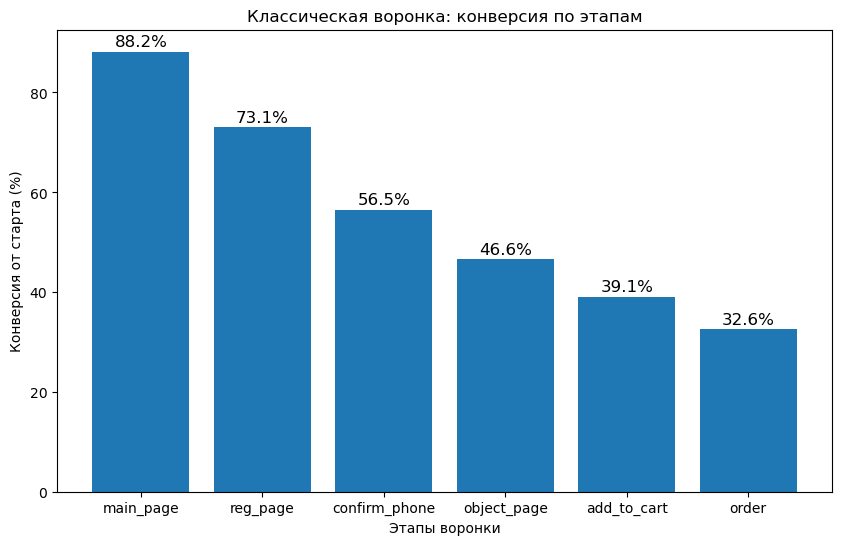

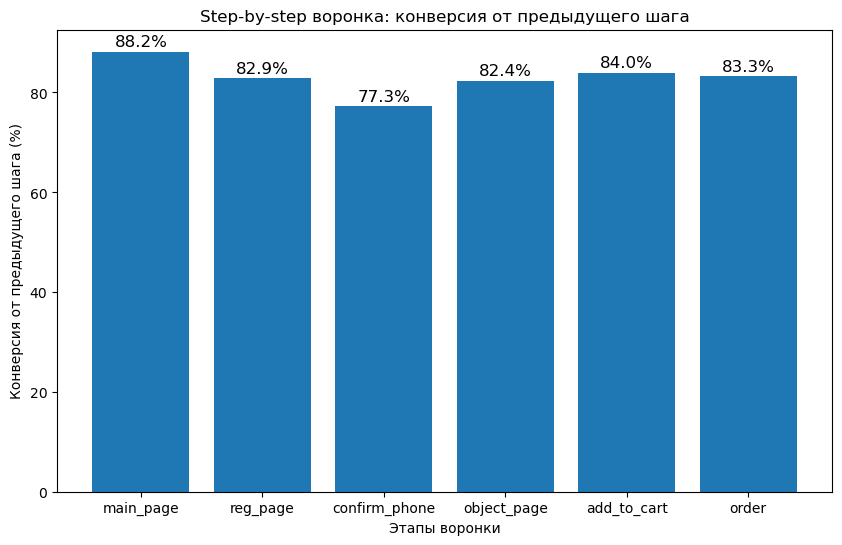

In [25]:
# Задаём порядок шагов в воронке
funnel_steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']

# Фильтруем датасет, оставляя только нужные шаги воронки
funnel_df_steps = df[df['event'].isin(funnel_steps)]
# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

# Добавляем конверсии
funnel_df['conversion_from_first_%'] = (funnel_df['users'] / funnel_df['users'].iloc[0] * 100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users'] / funnel_df['users'].shift(1) * 100).round(1)

display(funnel_df)

# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot
plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_first_%'][1:])

steps = funnel_df['step'][1:]
conversions = funnel_df['conversion_from_first_%'][1:]

# Перебираем в цикле значения конверсии, которые мы только что отобразили
for index, value in enumerate(conversions):
    # Для каждого значения добавляем текст на график
    # index: координата X (0 для первого столбца, 1 для второго и т.д.)
    # value + 1: координата Y (высота столбца + небольшой отступ сверху)
    # f'{value:.1f}%': текст для отображения (значение с 1 знаком после запятой + '%')
    # ha='center': выравнивание текста по центру столбца
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12, color='black')

plt.title('Классическая воронка: конверсия по этапам')
plt.ylabel('Конверсия от старта (%)')
plt.xlabel('Этапы воронки')
plt.show()

# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot
plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:])

steps = funnel_df['step'][1:]
conversions = funnel_df['conversion_from_previous_%'][1:]

# Перебираем в цикле значения конверсии, которые мы только что отобразили
for index, value in enumerate(conversions):
    # Для каждого значения добавляем текст на график
    # index: координата X (0 для первого столбца, 1 для второго и т.д.)
    # value + 1: координата Y (высота столбца + небольшой отступ сверху)
    # f'{value:.1f}%': текст для отображения (значение с 1 знаком после запятой + '%')
    # ha='center': выравнивание текста по центру столбца
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12, color='black')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Анализ воронок показывает, что основная утечка новых пользователей происходит на этапе регистрации и подтверждения телефона.

- **Классическая воронка (от первого шага):** Конверсия падает с 88% на `main_page` до 56% на `confirm_phone`, а к финальному этапу `order` доходит лишь около 32% от изначального числа пользователей. Это указывает на значительную потерю аудитории уже на ранних этапах.

- **Step-by-step воронка (от предыдущего шага):** Наиболее критичное падение конверсии наблюдается между `reg_page` и `confirm_phone` — здесь теряется каждый пятый пользователь (конверсия ~78%). Это означает, что процесс регистрации, особенно подтверждение телефона, является главным барьером для дальнейшего взаимодействия.

In [27]:
df['device_type'].unique()

array(['Desktop', 'Mobile'], dtype=object)

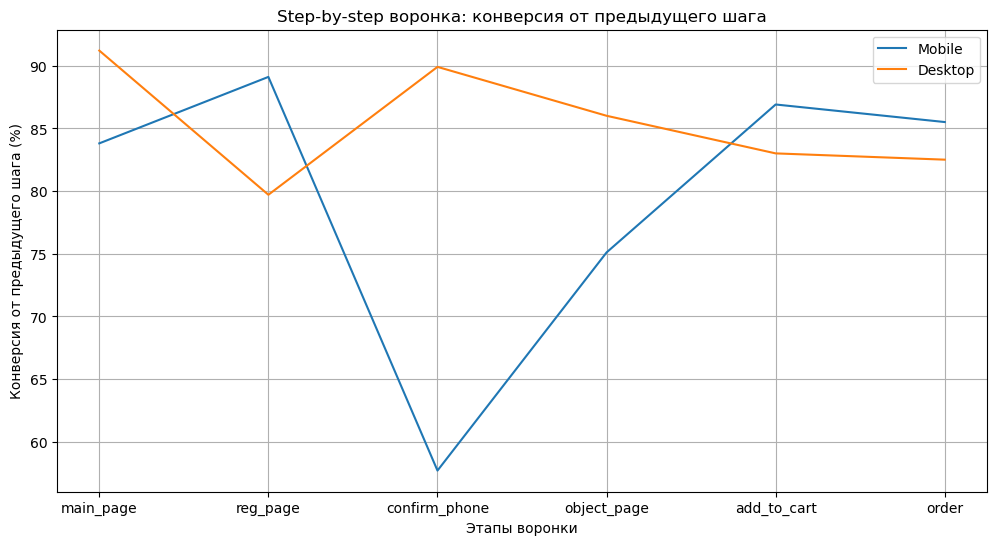

In [28]:
# Получаем списки пользователей по версиям приложения
mobile_ids = df[df['device_type'] == 'Mobile']['user_id'].unique()
desktop_ids = df[df['device_type'] == 'Desktop']['user_id'].unique()

# Фильтруем, оставляя только user_id с mobile_ids
funnel_df_steps_mobile = funnel_df_steps[funnel_df_steps['user_id'].isin(mobile_ids)]

# Считаем число уникальных пользователей на каждом шаге
funnel_counts_mobile = funnel_df_steps_mobile.groupby('event')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df_mobile = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts_mobile.values
})

# Добавляем конверсию
funnel_df_mobile['conversion_from_previous_%_mobile'] = (funnel_df_mobile['users'] / funnel_df_mobile['users'].shift(1) * 100).round(1)

# Проделываем те же шаги для десктопной версии
# Фильтруем, оставляя только user_id с desktop_ids
funnel_df_steps_desktop = funnel_df_steps[funnel_df_steps['user_id'].isin(desktop_ids)]

# Считаем число уникальных пользователей на каждом шаге
funnel_counts_desktop = funnel_df_steps_desktop.groupby('event')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df_desktop = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts_desktop.values
})

# Добавляем конверсию
funnel_df_desktop['conversion_from_previous_%_desktop'] = (funnel_df_desktop['users'] / funnel_df_desktop['users'].shift(1) * 100).round(1)

plt.figure(figsize=(12, 6))

# Строим linechart для conversion_from_previous_%_mobile по шагам
plt.plot(funnel_df_mobile['step'], funnel_df_mobile['conversion_from_previous_%_mobile'], label='Mobile')
    # Строим linechart для conversion_from_previous_%_desktop по шагам
plt.plot(funnel_df_desktop['step'], funnel_df_desktop['conversion_from_previous_%_desktop'], label='Desktop')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.legend()
plt.grid(True)
plt.show()

- Ключевое различие — крайне низкая конверсия на этапе `confirm_phone` в мобильной версии (около 58%), в то время как на десктопе она остаётся высокой (~90%). Это подтверждает гипотезу о проблемах в мобильном приложении, связанных с процессом подтверждения телефона.

- После этого этапа мобильные пользователи «восстанавливаются»: их конверсия на последующих шагах (`object_page`, `add_to_cart`, `order`) становится выше, чем у десктопных. Это говорит о том, что можно поработать над улучшением конверсии этих шагов для десктопной версии.

**Промежуточный вывод:** главная утечка — в мобильной регистрации. Оптимизация процесса подтверждения телефона в мобильном приложении может значительно повысить общий уровень конверсии.

---

## RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

In [31]:
# Фильтруем данные по значению столбца event, оставляя только покупателей
df_filtred_orders = df.loc[df['event'] == 'order']
df_filtred_orders = df.loc[df['revenue'] > 0].copy()
# Рассчитываем количество дней с покупки до анализа:
df_filtred_orders['order_recency'] = pd.to_datetime('2021-07-03') - pd.to_datetime(df_filtred_orders['datetime'].dt.date)

# Группируем данные для каждого пользователя и рассчитываем данные для RFM-анализа:
df_rfm = df_filtred_orders.groupby('user_id').agg(
    # Количество дней с последнего заказа:    
    recency = ('order_recency', lambda x: x.min().days),
    # Количество заказов за период времени: 
    frequency = ('order_id', 'nunique'),
    # Сумма стоимости всех заказов: 
    monetary_value = ('revenue', 'sum')
).reset_index()

# Проверяем результаты
display(df_rfm.head(3))

,user_id,recency,frequency,monetary_value
0,5210,59,1,2856.0
1,5506,33,2,7504.0
2,6291,58,1,3500.0


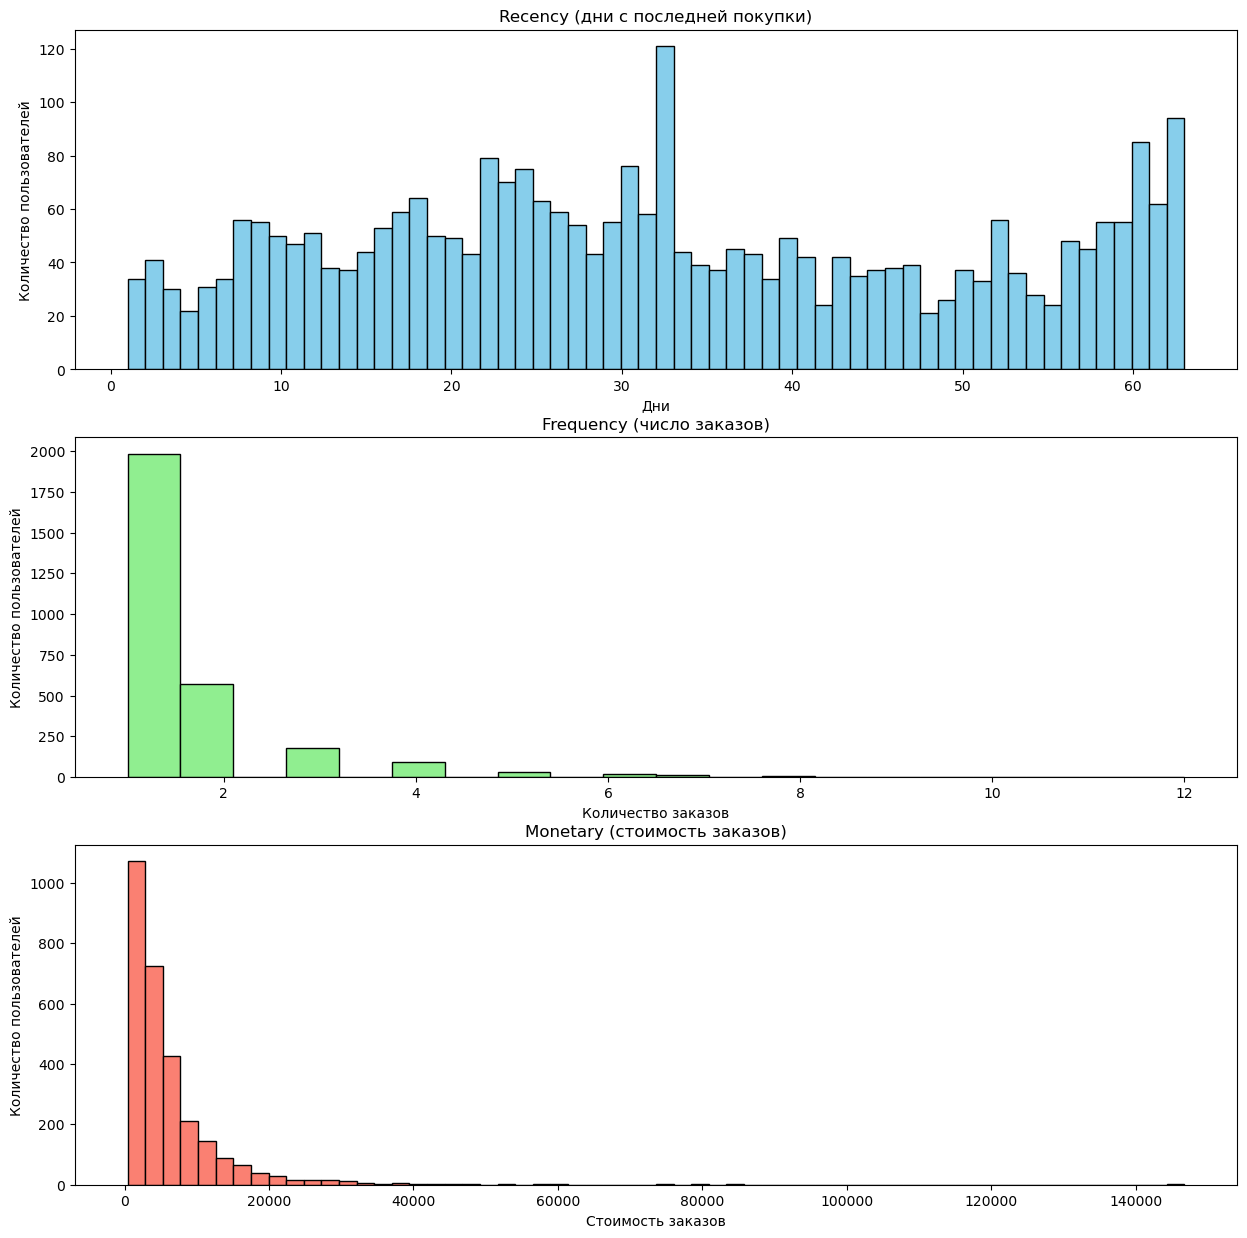

In [32]:
# Строим три гистограммы
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Давность
axes[0].hist(df_rfm['recency'], bins=60, color='skyblue', edgecolor='black')
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

# Частота
axes[1].hist(df_rfm['frequency'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

# Сумма всех заказов
axes[2].hist(df_rfm['monetary_value'], bins=60, color='salmon', edgecolor='black')
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()

- **Recency:** Распределение пользователей по давности покупок почти равномерное в пределах 60 дней — нет резких пиков или провалов, что говорит о стабильном, но не интенсивном возврате клиентов.
- **Frequency:** Подавляющее большинство клиентов (более 2000) совершили всего 1 заказ — это одноразовые пользователи. Лишь малая часть делает 2+ заказов.
- **Monetary:** Распределение сильно скошено — большинство тратят мало (до 5000 руб.), а небольшая группа высокодоходных клиентов делает крупные заказы (до 150 тыс. руб.).

**Промежуточны вывод:** аудитория состоит из одноразовых клиентов с низкой частотой и суммой покупок. Основная задача — стимулировать повторные заказы у тех, кто уже сделал первый.

In [34]:
# Определяем группу пользователя по количеству дней с момента последнего заказа: 
df_rfm['r'] = pd.cut(df_rfm['recency'], bins=3, labels=[3,2,1])

# Определяем группу пользователя по количеству заказов: 
df_rfm['f'] = pd.cut(df_rfm['frequency'], [1, 2, 3, 10000], labels=[1,2,3], include_lowest=True)

# Определяем группу пользователя по сумме стоимости заказов: 
df_rfm['m'] = pd.qcut(df_rfm['monetary_value'], q=3, labels=[1,2,3])

# Находим групповой RFM-индекс:
df_rfm[['r','f','m']] = df_rfm[['r','f','m']].astype('str')
df_rfm['rfm_group'] = df_rfm['r'] + df_rfm['f'] + df_rfm['m']

# Выводим на экран первые строки таблицы:
display(df_rfm.head(3))

,user_id,recency,frequency,monetary_value,r,f,m,rfm_group
0,5210,59,1,2856.0,1,1,2,112
1,5506,33,2,7504.0,2,1,3,213
2,6291,58,1,3500.0,1,1,2,112


In [35]:
# Группируем данные по сегментам и считаем их размер:
rfm_group = df_rfm.groupby('rfm_group').agg({'user_id':'nunique'}).reset_index()

# Считаем долю пользователей в каждом сегменте:
rfm_group['user_share'] = round(rfm_group['user_id'] / rfm_group['user_id'].sum(), 4)

# Выводим на экран результат:
display(rfm_group.sort_values(by='user_id', ascending=False))

,rfm_group,user_id,user_share
8,211,365,0.1261
9,212,341,0.1178
0,111,313,0.1082
15,311,301,0.1040
1,112,299,0.1033
16,312,272,0.0940
10,213,251,0.0867
17,313,215,0.0743
2,113,200,0.0691
12,223,70,0.0242


Самые большие сегменты по числу пользователей:
- **211** — 12,6% пользователей.
- **212** — 11,8% пользователей.
- **111** — 10,8% пользователей.
- **311** — 10,4% пользователей.
- В сегментах **112, 312, 213, 313 и 113** доля пользователей составляет от 7–10%.
- Доля остальных сегментов — менее 5%, а сегменты **333, 323, 322, 332** и другие с высокими показателями **F** и **M** — менее 2%.

- Самые ценные клиенты (например, **333, 323**) — крайне редки, но приносят наибольшую выручку. Их нужно удерживать эксклюзивными предложениями и персонализированным сервисом.
- Активные клиенты с потенциалом (**312, 311, 313, 213**) — недавно покупали, но частота или сумма ещё не максимальны. Их стоит стимулировать к повторным заказам через таргетированные акции и напоминания.
- Неактивные клиенты (**111, 112, 121, 122**) — давно не заказывали, но часть из них может вернуться при правильном вовлечении (например, через акции «возвращайся с бонусом»).

---

## K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [38]:
# Расчет метрик для каждого ресторана
restaurant_metrics = df_filtred_orders.groupby('rest_id').agg({
    'order_id': 'nunique',           # количество уникальных заказов
    'revenue': 'mean',               # средняя стоимость заказа
    'object_id': 'nunique'          # количество уникальных блюд
}).rename(columns={
    'order_id': 'total_orders',
    'revenue': 'avg_order_value',
    'object_id': 'unique_dishes_count'
}).reset_index()

display(restaurant_metrics.head(3))

,rest_id,total_orders,avg_order_value,unique_dishes_count
0,1be5a933aab34fbab594bebba48e976e,182,2385.644897,31
1,1d6bb74687104fa1953924c9684fe624,133,2984.793137,19
2,2c6095730b514c189ee41c65f03febc3,12,2050.570667,6


Для каждого ресторана расчитаны следующие метрики:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

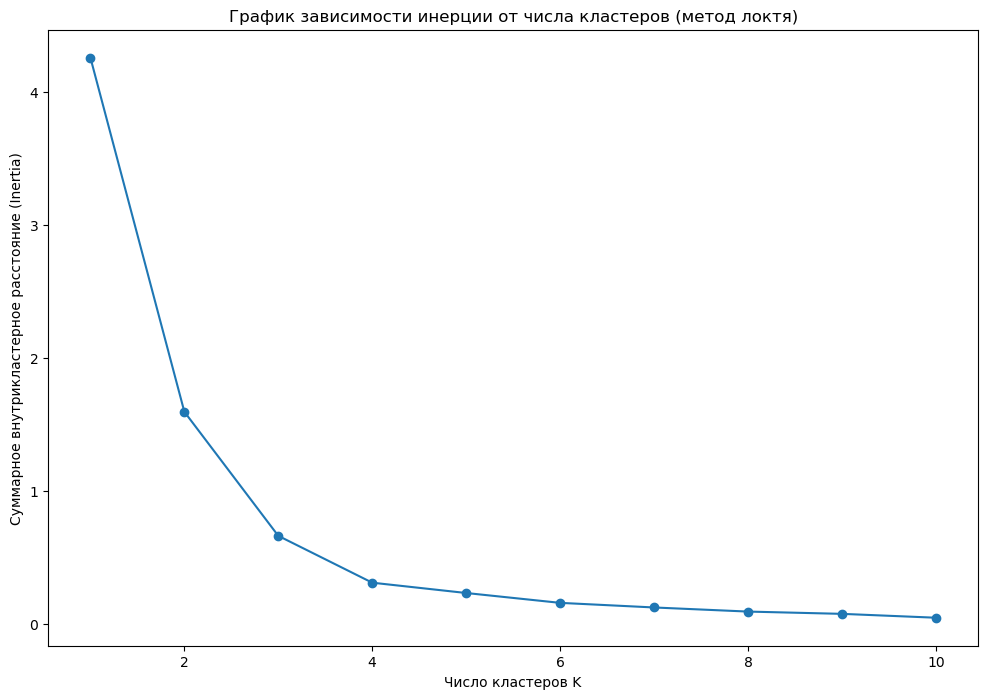

In [40]:
# Нормализация данных для кластеризации
metrics_to_normalize = ['total_orders', 'avg_order_value', 'unique_dishes_count']
    
for metric in metrics_to_normalize:
    restaurant_metrics[metric] = (
        restaurant_metrics[metric] - restaurant_metrics[metric].min()
    ) / (restaurant_metrics[metric].max() - restaurant_metrics[metric].min())

normalize_restaurant_metrics = restaurant_metrics[['total_orders', 'avg_order_value', 'unique_dishes_count']]

# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров
i = []

# Задаём диапазон количества кластеров
min_k = 1
max_k = 10

plt.figure(figsize=(12, 8))

# Перебираем разное количество кластеров
for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(normalize_restaurant_metrics)  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров
plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

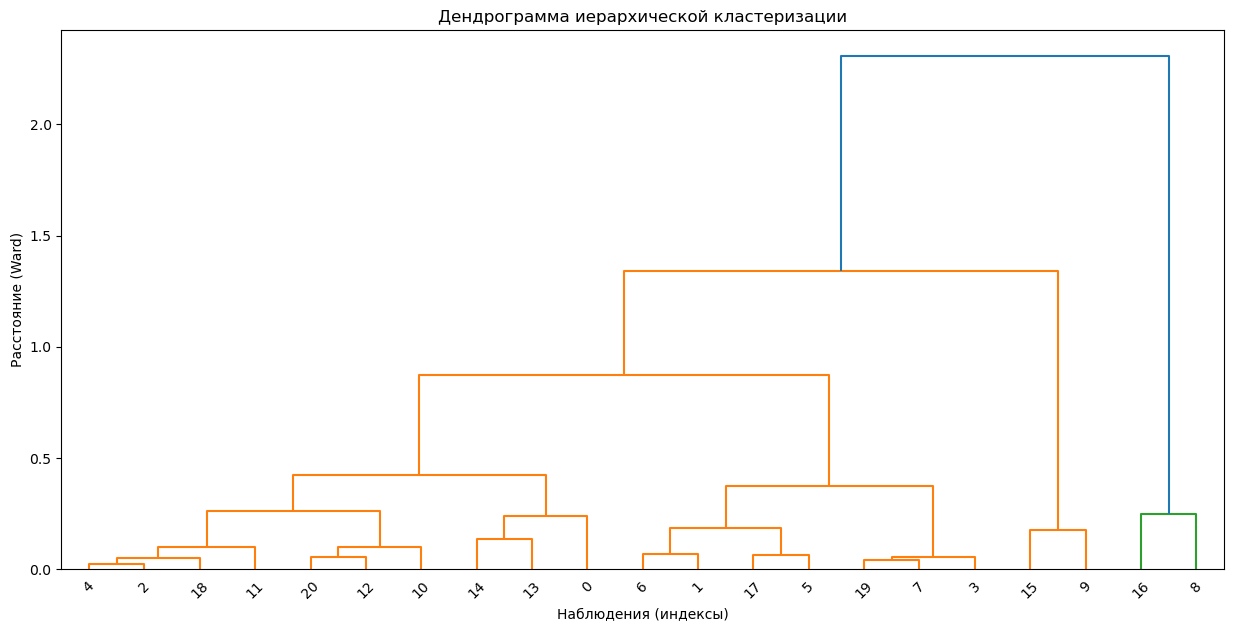

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Вычисляем матрицу связей между объектами.
# Метод 'ward' стремится минимизировать дисперсию внутри кластеров,
# что похоже на логику K-Means.
# Важно: для этого метода, как и для K-Means, нужно использовать масштабированные данные!
linked = linkage(normalize_restaurant_metrics, method='ward')

# Задаем размер графика для наглядности
plt.figure(figsize=(15, 7))

# Строим дендрограмму
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Наблюдения (индексы)')
plt.ylabel('Расстояние (Ward)')
plt.show()

На графике метода «локтя» видно, что после K=3 снижение инерции (внутрикластерного расстояния) резко замедляется — кривая становится пологой. Это означает, что добавление новых кластеров (4, 5 и далее) не даёт значимого улучшения качества группировки.

Следовательно, **оптимальное число кластеров — 3**, так как именно при этом значении достигается наилучший баланс между точностью кластеризации и простотой интерпретации результатов.

In [43]:
# Создаём экземпляр модели KMeans с указанием количества кластеров
kmeans = KMeans(n_clusters=3, random_state=42)
# Обучаем модель на данных и сразу получаем метки кластеров для каждой строки в датафрейме
labels = kmeans.fit_predict(normalize_restaurant_metrics)

# Сортируем кластеры по возрастанию «Количества заказов» (первый столбец, индекс 0)
sorted_indices = np.argsort(kmeans.cluster_centers_[:, 0])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

# Создаём DataFrame из центроидов
centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Количество заказов', 'Средняя стоимость заказа', 'Число заказанных уникальных блюд'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода (3 знака после точки)
pd.options.display.float_format = '{:.3f}'.format

# Выводим таблицу
print(centroids_df.head())

           Количество заказов  Средняя стоимость заказа  \
Кластер 1               0.048                     0.159   
Кластер 2               0.071                     0.639   
Кластер 3               0.922                     0.287   

           Число заказанных уникальных блюд  
Кластер 1                             0.072  
Кластер 2                             0.071  
Кластер 3                             0.920  


In [44]:
# Добавляем метки кластеров в исходный датафрейм
restaurant_metrics['cluster'] = labels

# Считаем количество ресторанов в каждом кластере
cluster_counts = restaurant_metrics['cluster'].value_counts().sort_index()

print("Количество ресторанов в каждом кластере:")
print(cluster_counts)

# Процентное соотношение
cluster_percentages = (restaurant_metrics['cluster'].value_counts(normalize=True) * 100).sort_index()
print("\nПроцентное соотношение:")
print(cluster_percentages.round(2))

Количество ресторанов в каждом кластере:
cluster
0    13
1     2
2     6
Name: count, dtype: int64

Процентное соотношение:
cluster
0   61.900
1    9.520
2   28.570
Name: proportion, dtype: float64


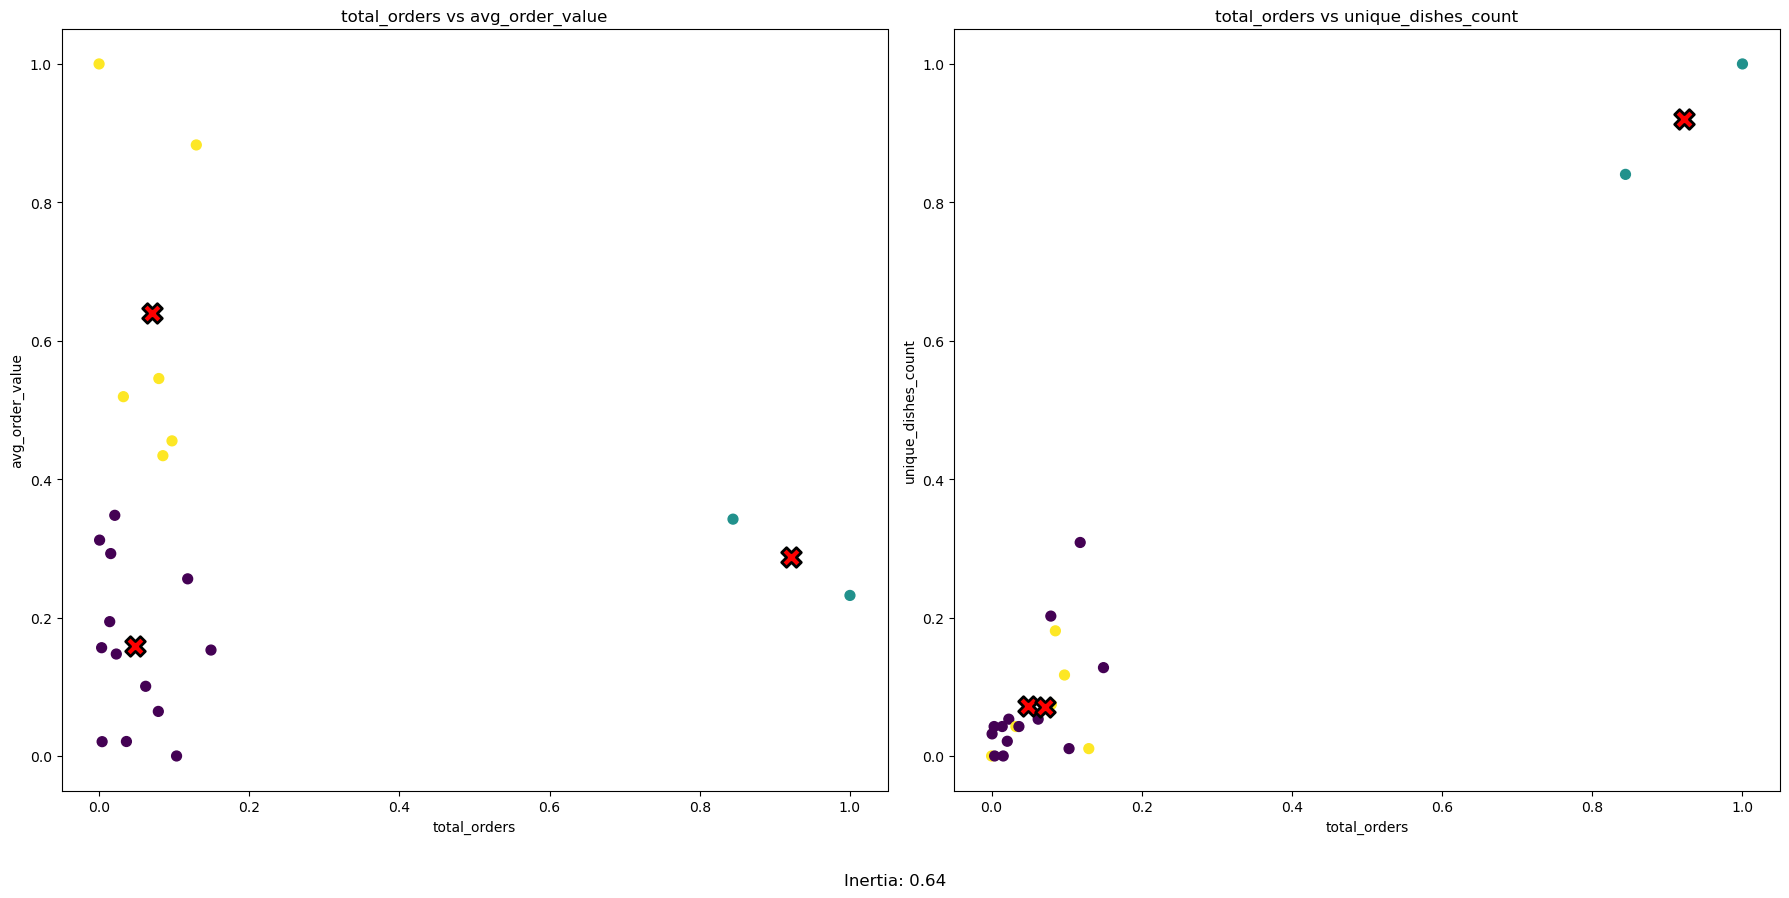

In [45]:
# Получаем координаты центров (центроидов) кластеров
centroids = kmeans.cluster_centers_

# Создаём 3 графика (1 строка × 3 столбца) для отображения попарных комбинаций признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Список названий признаков, которые будут использоваться на графиках
axs = ['total_orders', 'avg_order_value', 'unique_dishes_count']

# Перебираем пары признаков: (Speed vs Duration), (Speed vs Volume), (Duration vs Volume)
for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2]]):
   x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Строим точки — объекты из датафрейма, раскрашенные по меткам кластера
   axes[i].scatter(
       normalize_restaurant_metrics[x_label],  # Значения по оси X
       normalize_restaurant_metrics[y_label],  # Значения по оси Y
       c=labels,  # Цвет зависит от номера кластера
       cmap='viridis',  # Цветовая карта
       s=50  # Размер точек
   )

   # Строим центроиды кластеров красными крестами
   axes[i].scatter(
       centroids[:, x_idx],  # X-координаты центров
       centroids[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X'  # Форма маркера — крест
   )

   # Подписи осей и заголовок графика
   axes[i].set_xlabel(x_label)
   axes[i].set_ylabel(y_label)
   axes[i].set_title(f'{x_label} vs {y_label}')

# Подгоняем макет, оставляя место снизу для подписи с инерцией
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций
plt.show()

На основе нормализованных данных и визуализаций выделены три типа ресторанов с разными бизнес-моделями:

**Кластер 1:**
- Очень низкое количество заказов (0.048)
- Средний чек — средний (0.159)
- Небольшой ассортимент (0.072)

Это нишевые или новые рестораны с малым спросом. Возможно, они не оптимизированы под платформу или находятся в «спящем» режиме.

**Кластер 2:**
- Среднее количество заказов (0.071)
- Высокий средний чек (0.639) — самый высокий среди всех кластеров
- Малый ассортимент (0.071)

Это премиальные или специализированные заведения. Их клиенты готовы платить больше за узкий, но качественный выбор.

**Кластер 3:**
- Очень высокое количество заказов (0.922) — лидеры по объему
- Низкий средний чек (0.287)
- Большой ассортимент (0.920) — широкий выбор блюд

Это массовые рестораны-хиты, популярные у пользователей. Их модель — высокая частота заказов за счёт доступных цен и большого меню.

**Рекомендация:**
Для каждого кластера нужны свои маркетинговые стратегии:

- Кластер 1 — стимулировать через таргетированные акции и продвижение.
- Кластер 2 — подчеркивать премиальность, предлагать эксклюзивные пакеты для VIP-клиентов.
- Кластер 3 — поддерживать лидерство, оптимизировать логистику и предлагать программы лояльности для частых покупателей.

---

## Итоговый вывод и рекомендации

1. **Основная утечка пользователей** происходит на этапе подтверждения телефона в мобильном приложении — конверсия падает до 58% (против 90% на десктопе).

**Рекомендация:** срочно оптимизировать процесс регистрации в мобильной версии (упростить подтверждение телефона, добавить альтернативные способы входа).

2. **Аудитория состоит в основном из одноразовых клиентов:** более 70 % совершили только 1 заказ, и большинство тратят мало. При этом активные и ценные клиенты (RFM-сегменты 333, 323) — менее 2%.

**Рекомендация:** запустить таргетированные кампании по переводу клиентов из сегментов 311/312 в более лояльные (F ≥ 2) через персонализированные бонусы и напоминания.

3. **Рестораны делятся на три чётких типа:**
- массовые (высокий объём, низкий чек, большой ассортимент);
- премиальные (средний объём, высокий чек, узкое меню);
- и малые/нишевые (мало заказов).

**Рекомендация:** выстроить раздельную работу с партнёрами — поддержку и продвижение для малых, эксклюзивные предложения для премиальных, программы лояльности для массовых.

Эти меры позволят снизить отток на ранних этапах, повысить удержание и LTV клиентов, а также усилить взаимодействие с ресторанами за счёт персонализированного подхода.